<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/smarttransitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/data/Sample Dataset.zip'
# Specify the directory where you want to extract the contents
extraction_path = '/content/sample_dataset'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Unzipping completed!")


Unzipping completed!


In [ ]:
# List the directories and files in the extraction path
for root, dirs, files in os.walk(extraction_path):
    print(f'Directory: {root}')
    for file in files:
        print(f'    {file}')


Directory: /content/sample_dataset
Directory: /content/sample_dataset/Smart_Transformation
Directory: /content/sample_dataset/Smart_Transformation/Girls_transformation
Directory: /content/sample_dataset/Smart_Transformation/Girls_transformation/Relighting
Directory: /content/sample_dataset/Smart_Transformation/Girls_transformation/Relighting/seed1006
    seed1006_01.jpg
    seed1006_00.jpg
    seed1006_03.jpg
    seed1006_02.jpg
Directory: /content/sample_dataset/Smart_Transformation/Girls_transformation/Relighting/seed1001
    seed1001_03.jpg
    seed1001_00.jpg
    seed1001_01.jpg
    seed1001_02.jpg
Directory: /content/sample_dataset/Smart_Transformation/Girls_transformation/Relighting/seed1009
    seed1009_00.jpg
    seed1009_01.jpg
    seed1009_03.jpg
    seed1009_02.jpg
Directory: /content/sample_dataset/Smart_Transformation/Girls_transformation/Relighting/seed1005
    seed1005_03.jpg
    seed1005_01.jpg
    seed1005_00.jpg
    seed1005_02.jpg
Directory: /content/sample_dataset/S

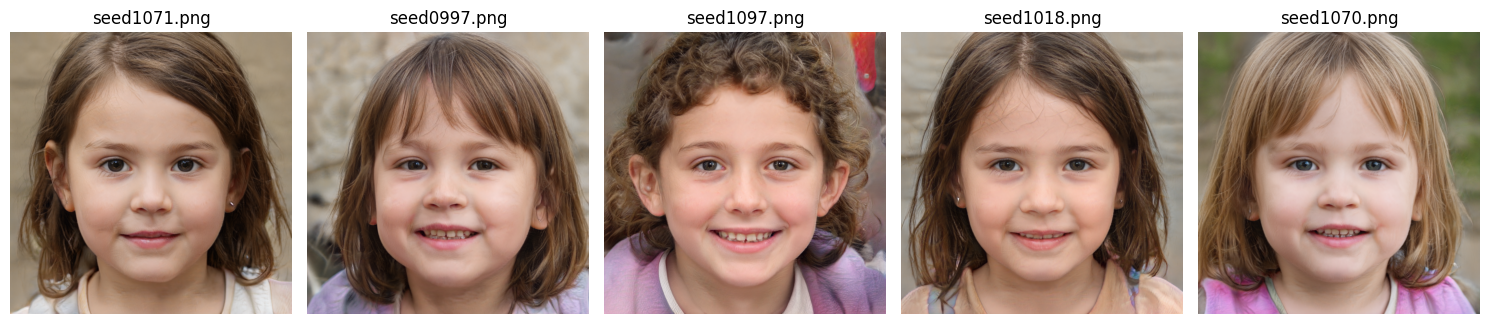

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the images
image_folder_path = '/content/sample_dataset/Child_Data/Girls'

# List all image files in the folder
image_files = os.listdir(image_folder_path)

# Number of images to display
num_images_to_display = min(5, len(image_files))  # Adjust as needed, ensure it doesn't exceed available images

# Create a figure with a specified number of columns
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))  # Adjust the figure size as needed

# Loop through the files and display images
for i, file in enumerate(image_files):
    if file.endswith('.png'):  # Ensure it's a PNG file
        image_path = os.path.join(image_folder_path, file)

        # Load the image
        image = Image.open(image_path)

        # Display the image in the corresponding subplot
        axes[i].imshow(image)
        axes[i].axis('off')  # Hide axes
        axes[i].set_title(file)  # Show the file name as title

    # Break after displaying the specified number of images
    if i + 1 >= num_images_to_display:
        break

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


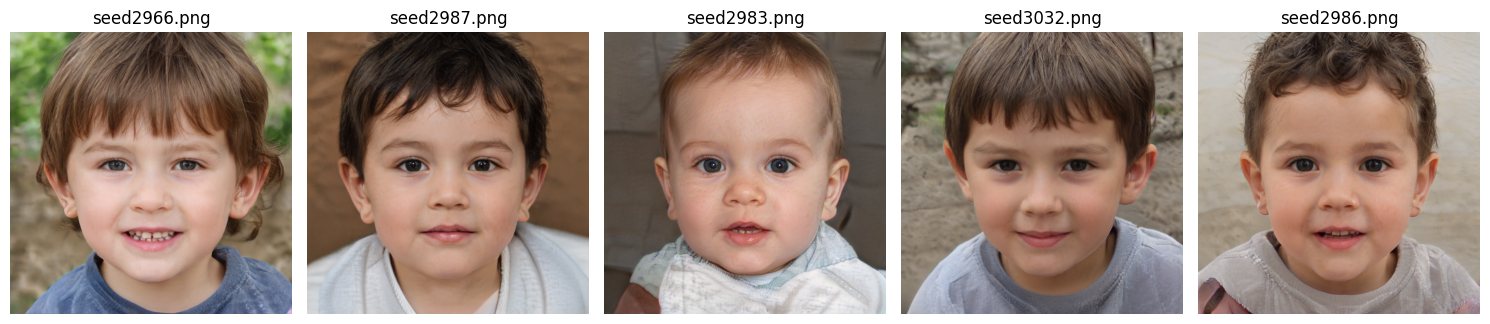

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the images
image_folder_path = '/content/sample_dataset/Child_Data/Boys'

# List all image files in the folder
image_files = os.listdir(image_folder_path)

# Number of images to display
num_images_to_display = min(5, len(image_files))  # Adjust as needed, ensure it doesn't exceed available images

# Create a figure with a specified number of columns
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))  # Adjust the figure size as needed

# Loop through the files and display images
for i, file in enumerate(image_files):
    if file.endswith('.png'):  # Ensure it's a PNG file
        image_path = os.path.join(image_folder_path, file)

        # Load the image
        image = Image.open(image_path)

        # Display the image in the corresponding subplot
        axes[i].imshow(image)
        axes[i].axis('off')  # Hide axes
        axes[i].set_title(file)  # Show the file name as title

    # Break after displaying the specified number of images
    if i + 1 >= num_images_to_display:
        break

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved: /content/drive/MyDrive/Processed_Images/landmarks_seed2966.png
Saved: /content/drive/MyDrive/Processed_Images/landmarks_seed2987.png
Saved: /content/drive/MyDrive/Processed_Images/landmarks_seed2983.png
Saved: /content/drive/MyDrive/Processed_Images/landmarks_seed1071.png
Saved: /content/drive/MyDrive/Processed_Images/landmarks_seed0997.png
Saved: /content/drive/MyDrive/Processed_Images/landmarks_seed1097.png


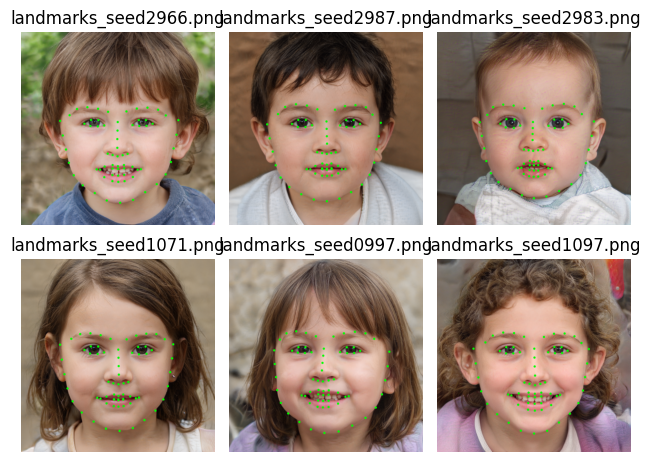

In [ ]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Set paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Step 3: Initialize dlib's face detector and create a facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor_path = '/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat'  # Make sure to upload this file
predictor = dlib.shape_predictor(predictor_path)

# Step 4: List all PNG image files in both directories
boys_image_files = [f for f in os.listdir(boys_folder_path) if f.lower().endswith('.png')]
girls_image_files = [f for f in os.listdir(girls_folder_path) if f.lower().endswith('.png')]

# Select a few images (e.g., first 3 from each)
selected_boys_images = boys_image_files[:3]
selected_girls_images = girls_image_files[:3]

# Combine selected images
selected_images = selected_boys_images + selected_girls_images
selected_paths = [os.path.join(boys_folder_path, img) for img in selected_boys_images] + \
                 [os.path.join(girls_folder_path, img) for img in selected_girls_images]

# Create an output directory in Google Drive
output_dir = '/content/drive/MyDrive/Processed_Images'
os.makedirs(output_dir, exist_ok=True)

# Function to save images with facial landmarks in Google Drive
def save_images_to_drive(image_paths, output_folder, detector, predictor):
    """
    Function to process images, draw facial landmarks, and save them to Google Drive.

    Args:
        image_paths (list): List of image file paths to process.
        output_folder (str): Path to the Google Drive folder where processed images will be saved.
        detector (dlib): Dlib's face detector object.
        predictor (dlib): Dlib's shape predictor object.
    """
    for img_path in image_paths:
        image = cv2.imread(img_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        faces = detector(gray)
        for face in faces:
            landmarks = predictor(gray, face)
            for n in range(68):
                x = landmarks.part(n).x
                y = landmarks.part(n).y
                cv2.circle(image, (x, y), 6, (0, 255, 0), -1)  # Draw a green circle at the landmark point

        # Save the image with landmarks to Google Drive
        filename = os.path.basename(img_path)
        save_path = os.path.join(output_folder, f'landmarks_{filename}')
        cv2.imwrite(save_path, image)
        print(f"Saved: {save_path}")

# Step 5: Call the function to process and save images to Google Drive
save_images_to_drive(selected_paths, output_dir, detector, predictor)

# Optional: Display the saved images
for i, img_path in enumerate(selected_paths):
    filename = os.path.basename(img_path)
    saved_image_path = os.path.join(output_dir, f'landmarks_{filename}')

    landmark_image = cv2.imread(saved_image_path)
    img_rgb = cv2.cvtColor(landmark_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    plt.subplot(2, 3, i + 1)  # Adjust layout based on number of images
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'landmarks_{filename}')

plt.tight_layout()
plt.show()


In [ ]:
!pip install opencv-python dlib albumentations matplotlib


In [ ]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import albumentations as A

# Mount Google Drive if using Google Colab
# drive.mount('/content/drive')

# Set paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
# Load Dlib's face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")  # Download from Dlib's website


In [ ]:
def get_face_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) > 0:
        landmarks = predictor(gray, faces[0])
        points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return points
    return None


In [ ]:
def create_skin_hair_masks(image, landmarks):
    # Define regions based on landmarks (simplified for demo purposes)
    skin_points = landmarks[0:27]  # Approximate face oval
    hair_points = landmarks[17:27] + landmarks[0:17]  # Hairline region

    # Create empty masks
    skin_mask = np.zeros(image.shape[:2], dtype=np.uint8)
    hair_mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Draw polygons for the regions
    cv2.fillPoly(skin_mask, [np.array(skin_points, np.int32)], 255)
    cv2.fillPoly(hair_mask, [np.array(hair_points, np.int32)], 255)

    return skin_mask, hair_mask


In [ ]:
def adjust_skin_tone(image, skin_mask):
    transform = A.Compose([
        A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2)
    ])
    augmented = transform(image=image)['image']
    image[skin_mask == 255] = augmented[skin_mask == 255]
    return image

def change_hair_color(image, hair_mask, color=(0, 0, 255)):  # Default color is red
    # Apply color change on the hair region
    hair_colored = image.copy()
    hair_colored[hair_mask == 255] = color
    return hair_colored


In [ ]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive if using Google Colab
# drive.mount('/content/drive')

# Set paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Load Dlib’s face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download this file from Dlib's website

# Function to get face landmarks
def get_face_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) > 0:
        landmarks = predictor(gray, faces[0])
        points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return points
    return None

# Function to create masks for skin and hair
def create_skin_hair_masks(image, landmarks):
    # Define skin and hair regions (simplified for demo purposes)
    skin_points = landmarks[0:27]  # Approximate face oval
    hair_points = landmarks[17:27] + landmarks[0:17]  # Hairline region

    # Create empty masks
    skin_mask = np.zeros(image.shape[:2], dtype=np.uint8)
    hair_mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Draw polygons for the regions
    cv2.fillPoly(skin_mask, [np.array(skin_points, np.int32)], 255)
    cv2.fillPoly(hair_mask, [np.array(hair_points, np.int32)], 255)

    return skin_mask, hair_mask

# Function to adjust skin tone with LAB color transformation
def adjust_skin_tone(image, skin_mask, target_tone=(140, 110, 90)):
    # Convert to LAB color space for better control of tone
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    mean_a, mean_b = np.mean(lab_image[skin_mask == 255, 1:3], axis=0)

    # Calculate the difference between target tone and current tone
    delta_a = target_tone[1] - mean_a
    delta_b = target_tone[2] - mean_b

    # Apply transformation to the skin region
    lab_image[skin_mask == 255, 1] = np.clip(lab_image[skin_mask == 255, 1] + delta_a, 0, 255)
    lab_image[skin_mask == 255, 2] = np.clip(lab_image[skin_mask == 255, 2] + delta_b, 0, 255)

    # Convert back to RGB color space
    return cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)

# Function to apply gradient-based hair color modification
def change_hair_color(image, hair_mask, color=(255, 0, 0)):  # Default is red for demonstration
    # Separate color channels
    r, g, b = color
    colorized_hair = image.copy()
    colorized_hair[hair_mask == 255, 0] = np.clip(image[hair_mask == 255, 0] * 0.4 + b * 0.6, 0, 255)
    colorized_hair[hair_mask == 255, 1] = np.clip(image[hair_mask == 255, 1] * 0.4 + g * 0.6, 0, 255)
    colorized_hair[hair_mask == 255, 2] = np.clip(image[hair_mask == 255, 2] * 0.4 + r * 0.6, 0, 255)

    # Apply a slight blur to the edges for better blending
    blurred_hair = cv2.GaussianBlur(colorized_hair, (7, 7), 0)
    combined_image = np.where(hair_mask[:, :, None] == 255, blurred_hair, image)
    return combined_image

# Function to process images and apply skin and hair modifications
def process_images(folder_path, skin_tone=(140, 110, 90), hair_color=(255, 150, 80)):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Get facial landmarks
            landmarks = get_face_landmarks(image)
            if landmarks:
                # Create skin and hair masks
                skin_mask, hair_mask = create_skin_hair_masks(image, landmarks)

                # Adjust skin tone and hair color
                modified_skin = adjust_skin_tone(image_rgb.copy(), skin_mask, target_tone=skin_tone)
                modified_hair = change_hair_color(modified_skin, hair_mask, color=hair_color)

                # Display the result
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(image_rgb)
                plt.title('Original Image')

                plt.subplot(1, 2, 2)
                plt.imshow(modified_hair)
                plt.title('Modified Skin Tone & Hair Color')

                plt.show()

# Run on Boys and Girls folders with custom tones and colors
process_images(boys_folder_path, skin_tone=(135, 105, 90), hair_color=(80, 20, 200))  # Example tones for boys
process_images(girls_folder_path, skin_tone=(160, 120, 100), hair_color=(255, 200, 0))  # Example tones for girls


# **Automated Facial Feature Enhancement for Skin Tone and Hair Color Modification Using Dlib and OpenCV**

In [ ]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Load Dlib’s face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")  # Download this file from Dlib's website

# Function to get face landmarks
def get_face_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) > 0:
        landmarks = predictor(gray, faces[0])
        points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return points
    return None

# Function to create masks for skin and hair
def create_skin_hair_masks(image, landmarks):
    # Define skin and hair regions (simplified for demo purposes)
    skin_points = landmarks[0:27]  # Approximate face oval
    hair_points = landmarks[17:27] + landmarks[0:17]  # Hairline region

    # Create empty masks
    skin_mask = np.zeros(image.shape[:2], dtype=np.uint8)
    hair_mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Draw polygons for the regions
    cv2.fillPoly(skin_mask, [np.array(skin_points, np.int32)], 255)
    cv2.fillPoly(hair_mask, [np.array(hair_points, np.int32)], 255)

    return skin_mask, hair_mask

# Function to adjust skin tone with LAB color transformation
def adjust_skin_tone(image, skin_mask, target_tone=(90, 100, 60), intensity=20.0):  # Increased intensity
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    mean_a, mean_b = np.mean(lab_image[skin_mask == 255, 1:3], axis=0)

    # Calculate the difference between target tone and current tone
    delta_a = (target_tone[1] - mean_a) * intensity
    delta_b = (target_tone[2] - mean_b) * intensity

    # Apply transformation to the skin region
    lab_image[skin_mask == 255, 1] = np.clip(lab_image[skin_mask == 255, 1] + delta_a, 0, 255)
    lab_image[skin_mask == 255, 2] = np.clip(lab_image[skin_mask == 255, 2] + delta_b, 0, 255)

    return cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)

# Function to apply gradient-based hair color modification
def change_hair_color(image, hair_mask, color=(255, 0, 0), blend_strength=1.0, blur_radius=15):  # Increased blend strength
    r, g, b = color
    colorized_hair = image.copy()
    colorized_hair[hair_mask == 255, 0] = np.clip(image[hair_mask == 255, 0] * (1 - blend_strength) + b * blend_strength, 0, 255)
    colorized_hair[hair_mask == 255, 1] = np.clip(image[hair_mask == 255, 1] * (1 - blend_strength) + g * blend_strength, 0, 255)
    colorized_hair[hair_mask == 255, 2] = np.clip(image[hair_mask == 255, 2] * (1 - blend_strength) + r * blend_strength, 0, 255)

    # Apply blur to soften edges
    blurred_hair = cv2.GaussianBlur(colorized_hair, (blur_radius, blur_radius), 0)
    combined_image = np.where(hair_mask[:, :, None] == 255, blurred_hair, image)
    return combined_image

# Example call to process_images with more dominant changes
process_images(boys_folder_path, skin_tone=(120, 90, 70), hair_color=(0, 0, 255), max_images=3)  # Stronger tone for boys
process_images(girls_folder_path, skin_tone=(170, 130, 110), hair_color=(0, 255, 0), max_images=3)  # Stronger tone for girls


# Run on Boys and Girls folders with custom tones and colors, limited to a few images
process_images(boys_folder_path, skin_tone=(135, 105, 90), hair_color=(80, 20, 200), max_images=3)  # Example tones for boys
process_images(girls_folder_path, skin_tone=(160, 120, 100), hair_color=(255, 200, 0), max_images=3)  # Example tones for girls


# **Facial Landmark-Based Image Processing and Relighting for Enhanced Feature Visualization**

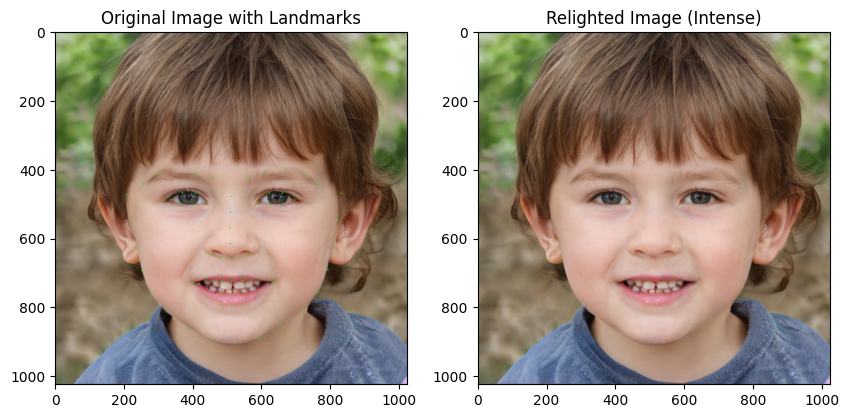

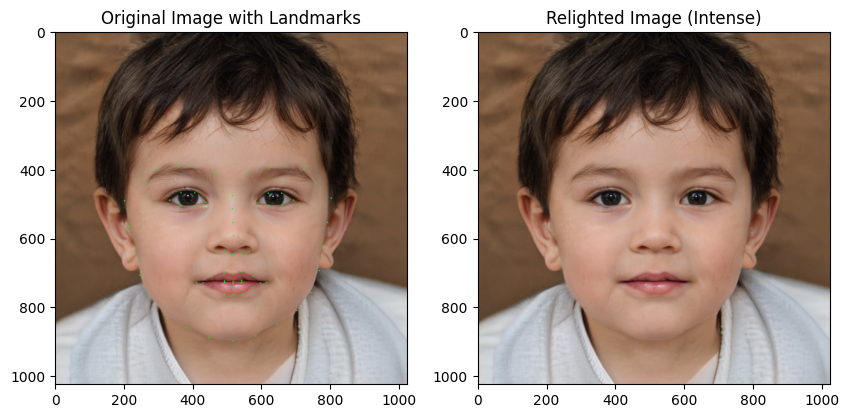

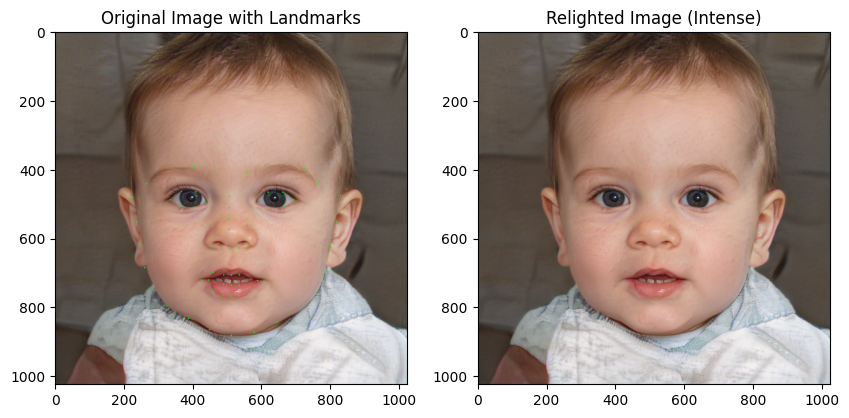

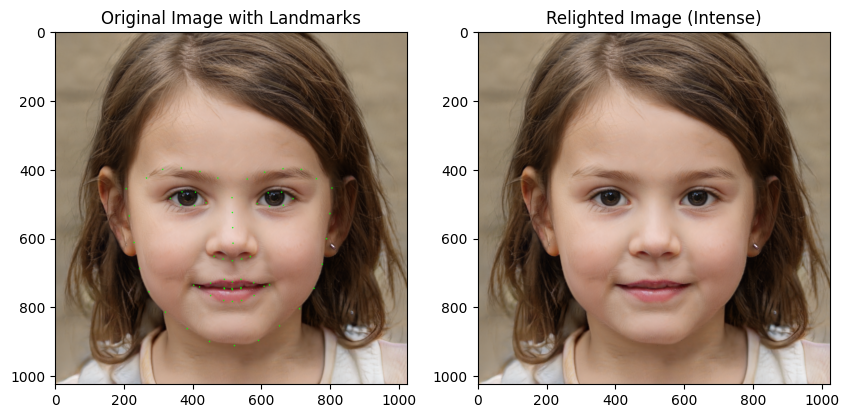

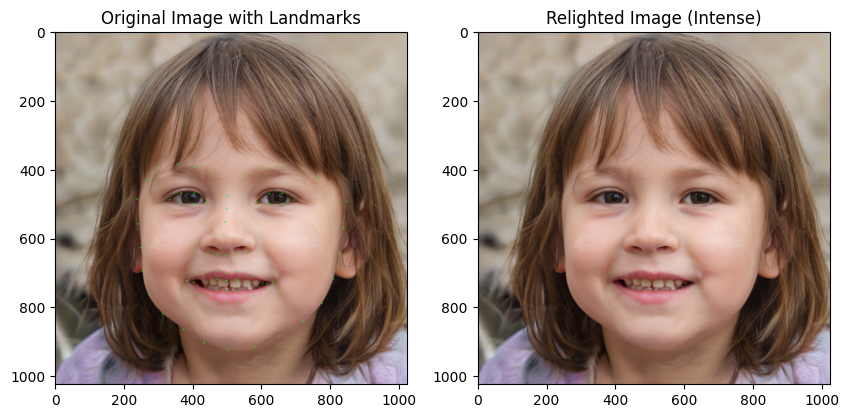

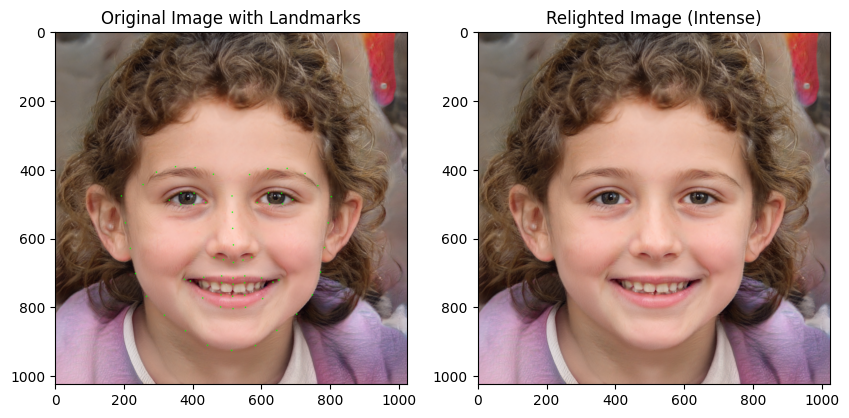

In [ ]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Set paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Load Dlib’s face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")  # Ensure correct path

# Function to get face landmarks
def get_face_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) > 0:
        landmarks = predictor(gray, faces[0])
        points = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return points
    return None

# Function to draw landmarks (optional visualization)
def draw_landmarks(image, landmarks):
    for (x, y) in landmarks:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Draw landmarks
    return image

# Function to relight the face with enhanced intensity
def relight_face(image, landmarks, light_direction=(0, -1), intensity_factor=2.0):
    relit_image = np.zeros_like(image, dtype=np.float32)

    for i, (x, y) in enumerate(landmarks):
        # Get the intensity of the current pixel
        intensity = np.mean(image[y, x])  # Mean color at the landmark
        # Calculate light adjustment based on direction and intensity factor
        adjustment = (light_direction[0] * (x - image.shape[1] / 2) +
                      light_direction[1] * (y - image.shape[0] / 2)) * intensity_factor / 100
        # Apply adjustment
        relit_image[y, x] = np.clip(intensity + adjustment, 0, 255)

    # Interpolate the values to fill the image
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if relit_image[y, x].any() == 0:  # If not adjusted
                relit_image[y, x] = image[y, x]  # Keep original

    return relit_image.astype(np.uint8)

# Function to process images and apply face relighting
def process_and_relight(folder_path, light_direction=(0, -1), intensity_factor=2.0, max_images=3):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Get facial landmarks
            landmarks = get_face_landmarks(image)
            if landmarks:
                # Draw landmarks for visualization (optional)
                image_with_landmarks = draw_landmarks(image_rgb.copy(), landmarks)

                # Relight the face
                relit_image = relight_face(image_rgb, landmarks, light_direction=light_direction, intensity_factor=intensity_factor)

                # Display the result
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(image_with_landmarks)
                plt.title('Original Image with Landmarks')

                plt.subplot(1, 2, 2)
                plt.imshow(relit_image)
                plt.title('Relighted Image (Intense)')

                plt.show()

                count += 1
                if count >= max_images:
                    break

# Run processing for boys and girls folders with desired lighting direction
process_and_relight(boys_folder_path, light_direction=(1, -1), intensity_factor=10)  # More intense lighting
process_and_relight(girls_folder_path, light_direction=(-1, -1), intensity_factor=10)  # More intense lighting


In [ ]:
import os
import cv2

# Set paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

# Load images
boys_images = load_images_from_folder(boys_folder_path)
girls_images = load_images_from_folder(girls_folder_path)

print(f'Loaded {len(boys_images)} images of boys and {len(girls_images)} images of girls.')


Loaded 106 images of boys and 106 images of girls.


In [ ]:
import dlib

# Load the face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")  # Ensure you have this file

def detect_faces_and_landmarks(images):
    results = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)
        for face in faces:
            landmarks = predictor(gray, face)
            results.append((img, landmarks))
    return results

# Detect faces and landmarks for boys and girls
boys_landmarks = detect_faces_and_landmarks(boys_images)
girls_landmarks = detect_faces_and_landmarks(girls_images)

print(f'Detected landmarks for {len(boys_landmarks)} boys images and {len(girls_landmarks)} girls images.')


Detected landmarks for 106 boys images and 107 girls images.


# **Estimation of Head Pose Using 2D-3D Correspondence with Facial Landmarks**

In [ ]:
import numpy as np

def estimate_head_pose(image, landmarks):
    # 2D image points
    image_points = np.array([
        (landmarks.part(30).x, landmarks.part(30).y),  # Nose tip
        (landmarks.part(8).x, landmarks.part(8).y),    # Chin
        (landmarks.part(36).x, landmarks.part(36).y),  # Left eye left corner
        (landmarks.part(45).x, landmarks.part(45).y),  # Right eye right corner
        (landmarks.part(48).x, landmarks.part(48).y),  # Left Mouth corner
        (landmarks.part(54).x, landmarks.part(54).y)   # Right mouth corner
    ], dtype="double")

    # 3D model points
    model_points = np.array([
        (0.0, 0.0, 0.0),          # Nose tip
        (0.0, -200.0, -200.0),   # Chin
        (-100.0, 100.0, -300.0), # Left eye left corner
        (100.0, 100.0, -300.0),  # Right eye right corner
        (-100.0, -100.0, -200.0),# Left Mouth corner
        (100.0, -100.0, -200.0)  # Right mouth corner
    ])

    # Camera internals
    focal_length = image.shape[1]  # Approximate focal length
    center = (image.shape[1] // 2, image.shape[0] // 2)
    camera_matrix = np.array(
        [[focal_length, 0, center[0]],
         [0, focal_length, center[1]],
         [0, 0, 1]], dtype="double"
    )

    # Assuming no lens distortion
    dist_coeffs = np.zeros((4, 1))

    # Solve PnP
    success, rotation_vector, translation_vector = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)

    return rotation_vector, translation_vector

# Example usage
for img, landmarks in boys_landmarks:  # You can do the same for girls_landmarks
    rotation_vector, translation_vector = estimate_head_pose(img, landmarks)
    print("Rotation Vector:", rotation_vector)
    print("Translation Vector:", translation_vector)


Rotation Vector: [[ 0.02464802]
 [ 3.122403  ]
 [-0.00403476]]
Translation Vector: [[   2.07596753]
 [ -81.06101885]
 [-963.92513953]]
Rotation Vector: [[-2.44052978e-03]
 [-3.12579882e+00]
 [-8.69718304e-02]]
Translation Vector: [[  -3.85456331]
 [ -66.79974048]
 [-966.66017182]]
Rotation Vector: [[-0.00657152]
 [-3.16005171]
 [-0.16469366]]
Translation Vector: [[   4.44240166]
 [ -53.13920993]
 [-975.66521762]]
Rotation Vector: [[ 0.00746646]
 [ 3.12004927]
 [-0.1162629 ]]
Translation Vector: [[    3.49427947]
 [  -98.63509525]
 [-1004.33628965]]
Rotation Vector: [[ 8.60340278e-04]
 [-3.14325219e+00]
 [-4.77860974e-02]]
Translation Vector: [[   1.48474376]
 [ -73.84129311]
 [-960.72159419]]
Rotation Vector: [[ 0.00696121]
 [ 3.12858982]
 [-0.08208677]]
Translation Vector: [[   1.40304641]
 [ -92.52410691]
 [-966.28584027]]
Rotation Vector: [[-1.54174596e-03]
 [-3.09168922e+00]
 [ 8.34212261e-03]]
Translation Vector: [[ -12.69701125]
 [ -81.82562994]
 [-932.35266283]]
Rotation Vector:

In [ ]:
def draw_pose_axes(image, rotation_vector, translation_vector, camera_matrix, dist_coeffs):
    # Define the axes length
    length = 100  # Length of the axes

    # Project 3D points (x, y, z) to 2D using the estimated pose
    axis_points = np.array([[length, 0, 0], [0, length, 0], [0, 0, -length]], dtype="double")
    projected_points, _ = cv2.projectPoints(axis_points, rotation_vector, translation_vector, camera_matrix, dist_coeffs)

    # Draw the axes
    origin = (int(image.shape[1] / 2), int(image.shape[0] / 2))  # Using center as origin
    cv2.line(image, origin, (int(projected_points[0][0][0]), int(projected_points[0][0][1])), (255, 0, 0), 3)  # X-axis
    cv2.line(image, origin, (int(projected_points[1][0][0]), int(projected_points[1][0][1])), (0, 255, 0), 3)  # Y-axis
    cv2.line(image, origin, (int(projected_points[2][0][0]), int(projected_points[2][0][1])), (0, 0, 255), 3)  # Z-axis

    return image


In [ ]:
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Assuming you already have camera_matrix and dist_coeffs defined
focal_length = boys_images[0].shape[1]  # Approximate focal length from the first image
center = (boys_images[0].shape[1] // 2, boys_images[0].shape[0] // 2)
camera_matrix = np.array(
    [[focal_length, 0, center[0]],
     [0, focal_length, center[1]],
     [0, 0, 1]], dtype="double"
)

# Assuming no lens distortion
dist_coeffs = np.zeros((4, 1))

# Visualizing the pose
for img, landmarks in boys_landmarks:
    rotation_vector, translation_vector = estimate_head_pose(img, landmarks)
    img_with_pose = draw_pose_axes(img, rotation_vector, translation_vector, camera_matrix, dist_coeffs)

    # Use cv2_imshow without a title
    cv2_imshow(img_with_pose)

# No need for cv2.waitKey(0) or cv2.destroyAllWindows() in Colab


# **Aging Effect Application to Child Images**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Function to add simple aging effects
def apply_aging_effects(image):
    # Check if the image is loaded properly
    if image is None:
        print("Error: Image not loaded correctly.")
        return None

    # Check if the image has 3 channels
    if image.shape[2] != 3:
        print("Error: Image does not have 3 channels.")
        return None

    # Convert to LAB color space for skin tone adjustments
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Simulate skin aging by decreasing the lightness channel
    l_channel = np.clip(l_channel * 0.8, 0, 255)  # Darken the image

    # Adjust the a and b channels to simulate skin tone changes
    a_channel = np.clip(a_channel + 5, 0, 255)  # Slight color shift
    b_channel = np.clip(b_channel - 5, 0, 255)  # Slight color shift

    # Debug: Print shapes of the channels
    print(f"L Channel shape: {l_channel.shape}, A Channel shape: {a_channel.shape}, B Channel shape: {b_channel.shape}")

    # Ensure all channels have the same shape before merging
    if l_channel.shape == a_channel.shape == b_channel.shape:
        # Merge channels back
        lab_image = cv2.merge((l_channel.astype(np.uint8), a_channel.astype(np.uint8), b_channel.astype(np.uint8)))
        aged_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)

        # Add wrinkles effect (simple random noise for demonstration)
        noise = np.random.normal(0, 25, aged_image.shape).astype(np.uint8)
        aged_image = cv2.addWeighted(aged_image, 0.9, noise, 0.1, 0)
        return aged_image
    else:
        print("Error: Channel shapes do not match for merging.")
        return None

# Function to process images in the folder
def process_images(folder_path, max_images=3):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)

            # Apply aging effects
            aged_image = apply_aging_effects(image)

            # Only display images if they were processed successfully
            if aged_image is not None:
                # Display the original and aged images
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title('Original Image')

                plt.subplot(1, 2, 2)
                plt.imshow(cv2.cvtColor(aged_image, cv2.COLOR_BGR2RGB))
                plt.title('Aged Image')

                plt.show()

                count += 1
                if count >= max_images:
                    break

# Run processing for boys and girls folders
process_images(boys_folder_path, max_images=3)
process_images(girls_folder_path, max_images=3)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Function to add enhanced aging effects
def apply_aging_effects(image):
    # Check if the image is loaded properly
    if image is None:
        print("Error: Image not loaded correctly.")
        return None

    # Check if the image has 3 channels
    if image.shape[2] != 3:
        print("Error: Image does not have 3 channels.")
        return None

    # Convert to LAB color space for skin tone adjustments
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Simulate skin aging by decreasing the lightness channel significantly
    l_channel = np.clip(l_channel * 0.6, 0, 255)  # Further darken the image

    # Adjust the a and b channels to simulate aging skin tone changes
    a_channel = np.clip(a_channel + 10, 0, 255)  # More color shift towards red
    b_channel = np.clip(b_channel - 10, 0, 255)  # More color shift towards yellow

    # Debug: Print shapes of the channels
    print(f"L Channel shape: {l_channel.shape}, A Channel shape: {a_channel.shape}, B Channel shape: {b_channel.shape}")

    # Ensure all channels have the same shape before merging
    if l_channel.shape == a_channel.shape == b_channel.shape:
        # Merge channels back
        lab_image = cv2.merge((l_channel.astype(np.uint8), a_channel.astype(np.uint8), b_channel.astype(np.uint8)))
        aged_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)

        # Add more pronounced wrinkles effect (adding Gaussian noise)
        noise = np.random.normal(0, 30, aged_image.shape).astype(np.uint8)  # Increased noise level
        aged_image = cv2.addWeighted(aged_image, 0.85, noise, 0.15, 0)

        # Optionally apply Gaussian blur to mimic older skin texture
        aged_image = cv2.GaussianBlur(aged_image, (5, 5), 0)  # Softening edges

        return aged_image
    else:
        print("Error: Channel shapes do not match for merging.")
        return None

# Function to process images in the folder
def process_images(folder_path, max_images=3):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)

            # Apply aging effects
            aged_image = apply_aging_effects(image)

            # Only display images if they were processed successfully
            if aged_image is not None:
                # Display the original and aged images
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title('Original Image')

                plt.subplot(1, 2, 2)
                plt.imshow(cv2.cvtColor(aged_image, cv2.COLOR_BGR2RGB))
                plt.title('Aged Image')

                plt.show()

                count += 1
                if count >= max_images:
                    break

# Run processing for boys and girls folders
process_images(boys_folder_path, max_images=3)
process_images(girls_folder_path, max_images=3)



In [ ]:
!git clone https://github.com/hectorgie/DeepFaceLab.git


Cloning into 'DeepFaceLab'...
remote: Enumerating objects: 6834, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 6834 (delta 138), reused 129 (delta 129), pack-reused 6691 (from 1)
Receiving objects: 100% (6834/6834), 788.42 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (4646/4646), done.
Updating files: 100% (202/202), done.


In [ ]:
%cd DeepFaceLab
!pip install -r requirements-colab.txt


/content/DeepFaceLab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 30.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.1.0.25 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84)
ERROR: No matching distribution found for opencv-python==4.1.0.25


In [ ]:
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'


In [ ]:
# Extract faces from the boys dataset
!python main.py extract --input_dir {boys_folder_path} --output_dir extracted_boys


Traceback (most recent call last):
  File "/content/DeepFaceLab/main.py", line 6, in <module>
    from core.leras import nn
  File "/content/DeepFaceLab/core/leras/__init__.py", line 1, in <module>
    from .nn import nn
  File "/content/DeepFaceLab/core/leras/nn.py", line 26, in <module>
    from core.interact import interact as io
  File "/content/DeepFaceLab/core/interact/__init__.py", line 1, in <module>
    from .interact import interact
  File "/content/DeepFaceLab/core/interact/interact.py", line 8, in <module>
    import colorama
ModuleNotFoundError: No module named 'colorama'


# **Automated Face Extraction and Expression Training Using DeepFaceLab**

In [ ]:
# Clone the DeepFaceLab repository
!git clone https://github.com/hectorgie/DeepFaceLab.git
%cd DeepFaceLab

# Install required packages including colorama
!pip install colorama
!pip install -r requirements-colab.txt

# Define data paths
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Extract faces from boys and girls datasets
!python main.py extract --input_dir {boys_folder_path} --output_dir extracted_boys
!python main.py extract --input_dir {girls_folder_path} --output_dir extracted_girls

# Train for desired expressions (this is a conceptual command)
!python main.py train --input_dir extracted_boys --output_dir trained_model --expressions happy angry sad surprised

# Merge new expressions into images
!python main.py merge --input_dir {boys_folder_path} --output_dir output_with_expressions --model trained_model


Cloning into 'DeepFaceLab'...
remote: Enumerating objects: 6834, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 6834 (delta 138), reused 129 (delta 129), pack-reused 6691 (from 1)
Receiving objects: 100% (6834/6834), 788.42 MiB | 27.66 MiB/s, done.
Resolving deltas: 100% (4646/4646), done.
Updating files: 100% (202/202), done.
/content/DeepFaceLab/DeepFaceLab
  Using cached numpy-1.17.0.zip (6.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached h5py-2.9.0.tar.gz (287 kB)
  Preparing metadata (setup.py) ... done
ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.1.0.25 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5

In [ ]:
# Step 1: Extract faces from boys dataset
!python main.py extract --input-dir {boys_folder_path} --output-dir extracted_boys --detector s3fd --face-type full_face

# Step 1: Extract faces from girls dataset
!python main.py extract --input-dir {girls_folder_path} --output-dir extracted_girls --detector s3fd --face-type full_face

# Step 2: Train the model
# Specify the training data source and destination directories, and the model type
!python main.py train --training-data-src-dir extracted_boys --training-data-dst-dir extracted_girls --model-dir model_dir --model Quick96

# Step 3: Merge expressions into images
# Make sure to specify the model type here as well
!python main.py merge --input-dir {boys_folder_path} --output-dir output_with_expressions --model-dir model_dir --model Quick96

[0] Max number of faces from image ( ?:help ) : 

In [ ]:
# Function to display images using OpenCV
def display_with_opencv(image_files, output_dir, num_images=5):
    for i in range(min(num_images, len(image_files))):
        # Load the image
        image_path = os.path.join(output_dir, image_files[i])
        image = cv2.imread(image_path)

        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show the image
        cv2.imshow(f'Image {i + 1}', image)
        cv2.waitKey(0)  # Wait for a key press to proceed to the next image

    cv2.destroyAllWindows()

# Display the first 5 images
display_with_opencv(image_files, output_dir, num_images=5)

